Task1_0530. 고객 정보 데이터프레임과 구매 내역 데이터프레임을 결합하여 각 고객이름(name) 별 총 지출을 계산하여 출력하세요.

In [1]:
import pandas as pd

# 고객 정보 데이터프레임 생성
customers = pd.DataFrame({
    'customer_id': [1, 2, 3, 4],
    'name': ['Alice', 'Bob', 'Charlie', 'David']
})

# 구매 내역 데이터프레임 생성
purchases = pd.DataFrame({
    'purchase_id': [101, 102, 103, 104, 105],
    'customer_id': [1, 2, 1, 3, 2],
    'amount': [250, 150, 200, 300, 350]
})
print(customers,'\n')
print(purchases)

   customer_id     name
0            1    Alice
1            2      Bob
2            3  Charlie
3            4    David 

   purchase_id  customer_id  amount
0          101            1     250
1          102            2     150
2          103            1     200
3          104            3     300
4          105            2     350


In [6]:
# 고객 데이터프레임과 구매내역 데이터프레임을 outer로 결합
customer_purchase = pd.merge(customers, purchases, on='customer_id', how='inner')
customer_purchase.fillna(0, inplace=True)
print(customer_purchase, '\n')

# 고객별 총 지출 계산
total = customer_purchase.groupby('name')['amount'].sum().reset_index()

# 결과 출력
print(total)


   customer_id     name  purchase_id  amount
0            1    Alice          101     250
1            1    Alice          103     200
2            2      Bob          102     150
3            2      Bob          105     350
4            3  Charlie          104     300 

      name  amount
0    Alice     450
1      Bob     500
2  Charlie     300


Task2_0530. 학생 성적 데이터프레임과 과목 데이터프레임을 결합하여 각 과목별 평균 성적을 계산하여 출력하세요.

In [7]:
import pandas as pd

# 학생 성적 데이터프레임 생성
grades = pd.DataFrame({
    'student_id': [1, 2, 3, 4, 1, 2, 3, 4],
    'subject_id': [101, 101, 102, 102, 103, 103, 101, 103],
    'grade': [85, 90, 78, 88, 92, 95, 80, 85]
})

# 과목 데이터프레임 생성
subjects = pd.DataFrame({
    'subject_id': [101, 102, 103],
    'subject_name': ['Math', 'Science', 'History']
})
print(grades,'\n')
print(subjects)

   student_id  subject_id  grade
0           1         101     85
1           2         101     90
2           3         102     78
3           4         102     88
4           1         103     92
5           2         103     95
6           3         101     80
7           4         103     85 

   subject_id subject_name
0         101         Math
1         102      Science
2         103      History


In [9]:
# 두 데이터프레임 결합 (inner join)
merged_df = pd.merge(grades, subjects, on='subject_id', how='inner')
print(merged_df, '\n')

# 과목별 평균 성적 계산
avg_grades = merged_df.groupby('subject_name')['grade'].mean().reset_index()
print(avg_grades)

   student_id  subject_id  grade subject_name
0           1         101     85         Math
1           2         101     90         Math
2           3         101     80         Math
3           3         102     78      Science
4           4         102     88      Science
5           1         103     92      History
6           2         103     95      History
7           4         103     85      History 

  subject_name      grade
0      History  90.666667
1         Math  85.000000
2      Science  83.000000


Task3_0530. 고객 데이터프레임에서 age가 30 이상이고 spending이 500 이상인 고객을 찾아 출력하세요.

In [11]:
import pandas as pd

# 예제 데이터프레임 생성
customers = pd.DataFrame({
    'customer_id': [1, 2, 3, 4, 5],
    'name': ['Alice', 'Bob', 'Charlie', 'David', 'Eve'],
    'age': [25, 35, 30, 40, 28],
    'spending': [300, 600, 500, 700, 400]
})
customers

,customer_id,name,age,spending
0,1,Alice,25,300
1,2,Bob,35,600
2,3,Charlie,30,500
3,4,David,40,700
4,5,Eve,28,400


In [13]:
con1 = customers['age'] >= 30
con2 = customers['spending'] >= 500
filterd_customers = customers[con1 & con2]

# 결과출력
print(filterd_customers)

   customer_id     name  age  spending
1            2      Bob   35       600
2            3  Charlie   30       500
3            4    David   40       700


Task4_0530. 학생 성적 데이터프레임에서 math_score가 80 이상 90 이하인 학생을 찾아 출력하세요.

In [14]:
import pandas as pd

# 예제 데이터프레임 생성
students = pd.DataFrame({
    'student_id': [101, 102, 103, 104, 105],
    'name': ['Alice', 'Bob', 'Charlie', 'David', 'Eve'],
    'math_score': [75, 85, 88, 92, 78],
    'english_score': [80, 78, 82, 88, 90]
})
students

,student_id,name,math_score,english_score
0,101,Alice,75,80
1,102,Bob,85,78
2,103,Charlie,88,82
3,104,David,92,88
4,105,Eve,78,90


In [15]:
# 조건을 만족한느 학생 찾기 (80 <= math_score <= 90)
c1 = students['math_score'] >= 80
c2 = students['math_score'] >= 90
filtered_students = students[c1 & c2]

# 결과 출력
print(filtered_students)

   student_id   name  math_score  english_score
3         104  David          92             88


Task5_0530. 주어진 titanic3 데이터셋에서 survived 열을 사용하여 생존자와 비생존자의 수를 계산하여 출력하세요.

In [17]:
from google.colab import files

# 파일 업로드
uploaded = files.upload()

Saving titanic3.csv to titanic3.csv


In [18]:
import pandas as pd

# 데이터프레임 읽기
file_path = 'titanic3.csv'
df = pd.read_csv(file_path)

In [20]:
# 생존자와 비생존자 수 계산
survival_counts = df['survived'].value_counts()

# 결과 출력
print(survival_counts)

survived
0    809
1    500
Name: count, dtype: int64


Task6_0530. 주어진 titanic3 데이터셋에서 pclass 열을 기준으로 각 객실 등급의 평균 운임(fare)을 계산하여 출력하세요.

In [22]:
mean_fare = df.groupby('pclass')['fare'].mean()
print(mean_fare)

pclass
1    87.508992
2    21.179196
3    13.302889
Name: fare, dtype: float64


Task7_0530. titanic3 각 변수의 상관계수를 통해 각 변수와 목표 변수(생존 여부) 간의 관계를 파악하세요.

In [24]:
import numpy as np

# 문자열 변수를 숫자형으로 변환
df['sex'] = df['sex'].map({'male':0, 'female':1})

# 숫자형 변수만 선택
numeric_df = df.select_dtypes(include=[np.number])

# 상관계수 계산
correlation_matrix = numeric_df.corr()

# 생존 여부와의 상관계수 정렬
survival_correlation = correlation_matrix['survived'].sort_values(ascending=False)
print(survival_correlation)

survived    1.000000
sex         0.528693
fare        0.244265
parch       0.082660
sibsp      -0.027825
age        -0.055512
pclass     -0.312469
body             NaN
Name: survived, dtype: float64


Task8_0530. 승객의 가족 크기(동반한 형제자매/배우자 수와 부모/자녀 수의 합)가 생존에 영향을 미치는지를 탐색하여 결과를 출력하세요.

In [25]:
# 가족 크기 계산 (형재자매/ 배우자 수 + 부모/자녀 수)
df['family_size'] = df['sibsp'] + df['parch']

# 생존 여부와 가족 크기의 관계 탐색
survival_family_correlation = df[['family_size', 'survived']].corr().iloc[0, 1]

survival_family_correlation

0.02687643412533259

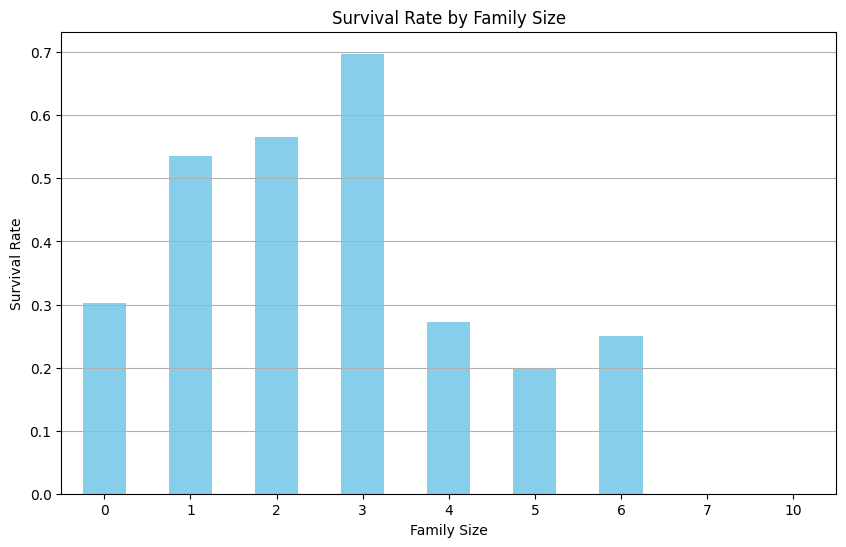

In [26]:
import matplotlib.pyplot as plt

# 가족 크기별 생존율 계산
family_survival_rate = df.groupby('family_size')['survived'].mean()

# 그래프 그리기
plt.figure(figsize=(10, 6))
family_survival_rate.plot(kind='bar', color='skyblue')
plt.title('Survival Rate by Family Size')
plt.xlabel('Family Size')
plt.ylabel('Survival Rate')
plt.xticks(rotation=0)
plt.grid(axis='y')

plt.show()

Task9_0530. 객실 등급별 평균 요금(mean_fare_by_pclass)이 생존에 미치는 영향을 분석하기 위해 mean_fare_by_pclass라는 파생 변수를 생성하여 출력하세요.

In [27]:
# 객실 등급별 평균 요금 계산
mean_fare_by_pclass = df.groupby('pclass')['fare'].mean().to_dict()
print(mean_fare_by_pclass, '\n')

# 객실 등급별 평균 요금 파생 변수 생성
df['mean_fare_by_pclass'] = df['pclass'].map(mean_fare_by_pclass)

df[['pclass', 'fare', 'mean_fare_by_pclass']].head()

{1: 87.50899164086687, 2: 21.179196389891697, 3: 13.302888700564973} 



,pclass,fare,mean_fare_by_pclass
0,1,211.3375,87.508992
1,1,151.5500,87.508992
2,1,151.5500,87.508992
3,1,151.5500,87.508992
4,1,151.5500,87.508992


In [29]:
# mean_fare_by_pclass와 생존 여부 간의 상관계수 계산
mean_fare_survival_correlation = df[['mean_fare_by_pclass','survived']].corr().iloc[0, 1]
mean_fare_survival_correlation

0.2918753351352463

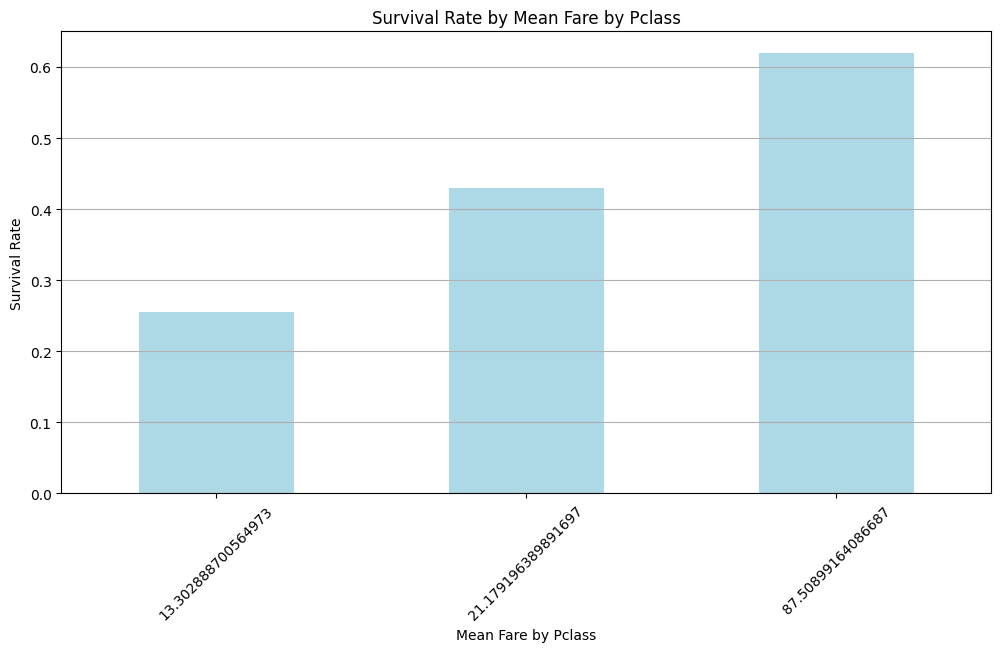

In [31]:
#  생존율과 Mean Fare by Pclass 간의 막대그래프 그리기

# 생존율 계산
survival_rate_by_fare = df.groupby('mean_fare_by_pclass')['survived'].mean()

# 그래프 그리기
plt.figure(figsize=(12, 6))
survival_rate_by_fare.plot(kind='bar', color='lightblue')
plt.title('Survival Rate by Mean Fare by Pclass')
plt.xlabel('Mean Fare by Pclass')
plt.ylabel('Survival Rate')
plt.xticks(rotation=45)
plt.grid(axis='y')

plt.show()